NAME:- SHUBHAM D ALONE
DATE:- 22/09/2024
TIME:- 12:20AM

I used this dataset to solve examples of real life business problems. I did not have a commercial purpose. My purpose is make practice and learning.

Business Problems¶
Sales Performance Analysis

How are the sales trending over time? Are there any noticeable seasonal patterns?
Which ship mode is most frequently chosen by customers?
What are the top-selling products or categories?
Geographical Insights

Which countries, cities, or states contribute the most to the sales revenue?
Are there any specific regions where sales are consistently lower? What factors might be contributing to this?
Customer Segmentation

Use the Recency, Frequency, and Monetary (RFM) framework to segment customers.
Segment customers based on their likelihood to churn (stop making purchases). Identify at-risk customers.
Product Analysis

Are there specific products or sub-categories that are driving the majority of sales?
Are there product categories that are gaining or losing popularity among customers over time?
Order Processing Efficiency

Are there specific shipping modes that tend to have quicker or slower processing times?
I am grateful for feedbacks.

Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [2]:
df = pd.read_csv("F:/train.csv")

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


Summary df

In [4]:
num_samples = 3
summary_data = []

for column in df.columns:
    null_count = df[column].isnull().sum()
    unique_count = df[column].nunique()
    data_type = df[column].dtype
    min_value = df[column].min() if pd.api.types.is_numeric_dtype(data_type) else None
    max_value = df[column].max() if pd.api.types.is_numeric_dtype(data_type) else None
    mean = df[column].mean() if pd.api.types.is_numeric_dtype(data_type) else None
    std_dev = df[column].std() if pd.api.types.is_numeric_dtype(data_type) else None
    top_value = df[column].mode()[0] if pd.api.types.is_object_dtype(data_type) else None
    top_value_freq = df[column].value_counts().max() if pd.api.types.is_object_dtype(data_type) else None
    sample_values = df[column].sample(num_samples).tolist()
    
    summary_data.append([column, null_count, unique_count, data_type, min_value, max_value, mean, std_dev, top_value, top_value_freq, sample_values])

    summary_df = pd.DataFrame(summary_data, columns=['Column', 'Null Count', 'Unique Count', 'Data Type', 'Min Value', 'Max Value', 'Mean', 'Std Dev', 'Top Value', 'Top Value Frequency', 'Sample Values'])
summary_df

,Column,Null Count,Unique Count,Data Type,Min Value,Max Value,Mean,Std Dev,Top Value,Top Value Frequency,Sample Values
0,Row ID,0,9800,int64,1.000,9800.00,4900.500000,2829.160653,None,NaN,"[6682, 2079, 7210]"
1,Order ID,0,4922,object,NaN,NaN,NaN,NaN,CA-2018-100111,14.0,"[CA-2015-166863, CA-2016-129532, CA-2016-160472]"
2,Order Date,0,1230,object,NaN,NaN,NaN,NaN,05/09/2017,38.0,"[05/05/2018, 13/03/2017, 23/05/2016]"
3,Ship Date,0,1326,object,NaN,NaN,NaN,NaN,26/09/2018,34.0,"[29/10/2015, 28/12/2018, 21/11/2018]"
4,Ship Mode,0,4,object,NaN,NaN,NaN,NaN,Standard Class,5859.0,"[First Class, Standard Class, Second Class]"
5,Customer ID,0,793,object,NaN,NaN,NaN,NaN,WB-21850,35.0,"[ZC-21910, SC-20800, RD-19480]"
6,Customer Name,0,793,object,NaN,NaN,NaN,NaN,William Brown,35.0,"[Damala Kotsonis, Shaun Chance, Mike Pelletier]"
7,Segment,0,3,object,NaN,NaN,NaN,NaN,Consumer,5101.0,"[Home Office, Consumer, Consumer]"
8,Country,0,1,object,NaN,NaN,NaN,NaN,United States,9800.0,"[United States, United States, United States]"
9,City,0,529,object,NaN,NaN,NaN,NaN,New York City,891.0,"[Los Angeles, Los Angeles, Waynesboro]"


In [5]:
# Convert data types to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Drop columns
df = df.drop(['Row ID'],axis=1)

# Sort values by order date
df.sort_values('Order Date', ascending=True, inplace=True)

In [6]:
df.loc[df['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
9741,CA-2016-117086,2016-11-08,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92


In [7]:
# Fillna values in 'Postal Code' with correct postal code

df['Postal Code'] = df['Postal Code'].fillna(5401)

Sales Performance Analysis

C:\Users\LEGION\AppData\Local\Temp\ipykernel_6296\4015137622.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = order_date_df['Sales'].resample('Q').sum()


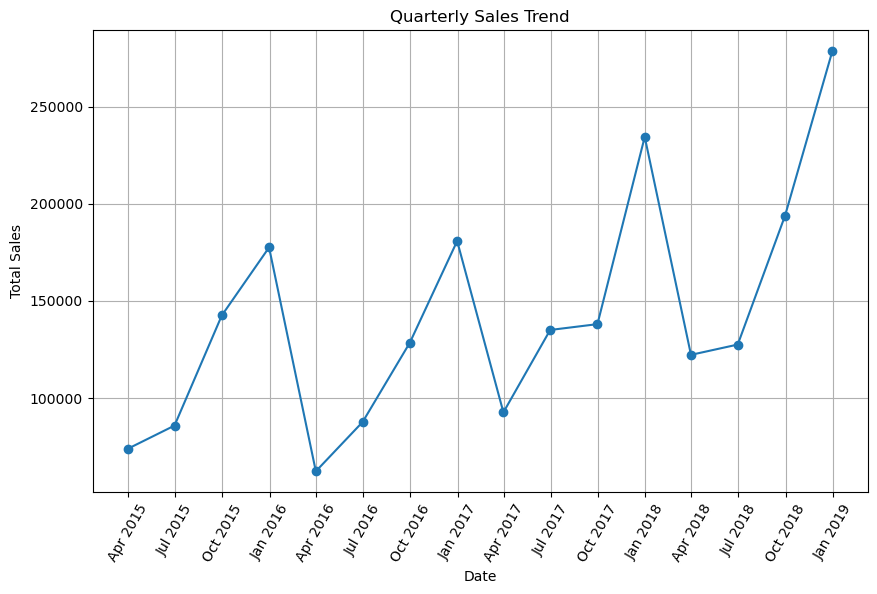

In [8]:
from matplotlib.dates import MonthLocator, DateFormatter

order_date_df = df.set_index('Order Date') # We create a new df but this has 'Order Date' as index, that will help us

# Quarterly sales
quarterly_sales = order_date_df['Sales'].resample('Q').sum()
quarterly_sales = quarterly_sales.round(2)

plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='-')

# Customize x-axis ticks for quarterly intervals
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[1, 4, 7, 10]))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

plt.title('Quarterly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

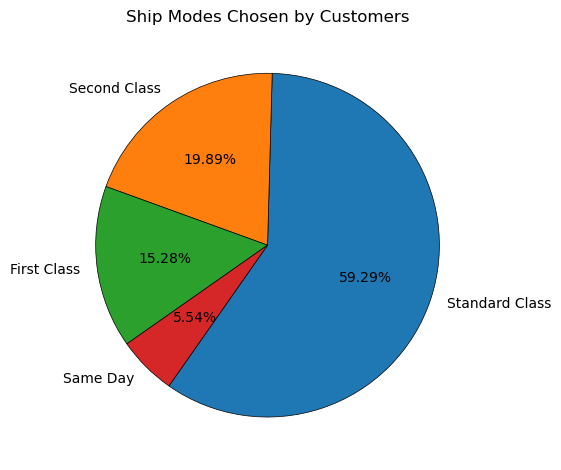

In [9]:
# Create a new df of total sales of ship mode and count of ship modes columns

ship_mode_df = df.groupby('Ship Mode').sum(numeric_only=True).sort_values('Sales', ascending=False)
ship_mode_df = ship_mode_df[['Sales']]
ship_mode_df['Count'] = df['Ship Mode'].value_counts()
ship_mode_df.reset_index(inplace=True)

plt.pie(ship_mode_df['Sales'], labels=ship_mode_df['Ship Mode'], autopct='%1.2f%%',
        startangle=235, wedgeprops={'edgecolor':'black','linewidth':0.5})
plt.title('Ship Modes Chosen by Customers')
plt.tight_layout()
plt.show()

As we can see standard class has a percentile of 59.29, it is really high.

In [10]:
df.groupby('Ship Mode').mean(numeric_only=True).sort_values('Sales', ascending=False)[['Sales']]

,Sales
Ship Mode,
Second Class,236.547939
Same Day,232.749143
First Class,230.228020
Standard Class,228.849856


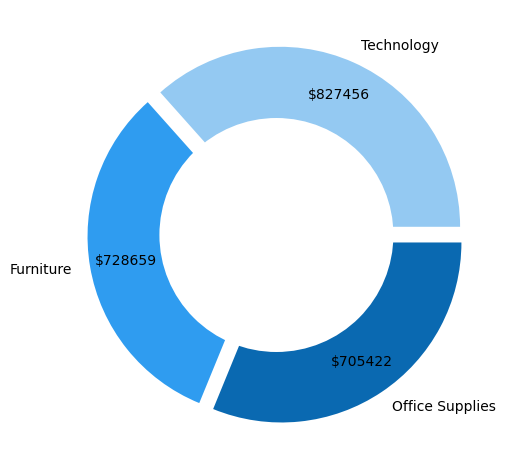

In [11]:
category_df = df.groupby('Category').sum(numeric_only=True).sort_values('Sales', ascending=False)[['Sales']]
category_df['Sales'] = category_df['Sales'].round(2)
category_df.reset_index(inplace=True)

colors = ['#94C9F2','#2F9CF0','#0A69B1']
explode = [0.05, 0.05, 0.05]

# display actual values instead of percentages
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '${v:d}'.format(v=val)
    return my_format

plt.pie(category_df['Sales'], labels=category_df['Category'],colors=colors,
       explode=explode, autopct=autopct_format(category_df['Sales']),
       pctdistance=0.80)

circle = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(circle)
plt.tight_layout()
plt.show()

In [12]:
product_df = df.groupby('Product Name').sum(numeric_only=True).sort_values('Sales', ascending=False)
product_df = product_df[['Sales']]
product_df['Sales'] = product_df['Sales'].round(2)
product_df['Amount'] = df['Product Name'].value_counts()
product_df.reset_index(inplace=True)
product_df['Price'] = round(product_df['Sales']/product_df['Amount'],2)
product_df.head(15)

,Product Name,Sales,Amount,Price
0,Canon imageCLASS 2200 Advanced Copier,61599.82,5,12319.96
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,10,2745.34
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48,1,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58,8,2733.82
4,GBC DocuBind TL300 Electric Binding System,19823.48,11,1802.13
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50,9,2113.83
6,Hewlett Packard LaserJet 3310 Copier,18839.69,8,2354.96
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90,3,6124.97
8,GBC DocuBind P400 Electric Binding System,17965.07,6,2994.18
9,High Speed Automatic Electric Letter Opener,17030.31,3,5676.77


Geographical Insights

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


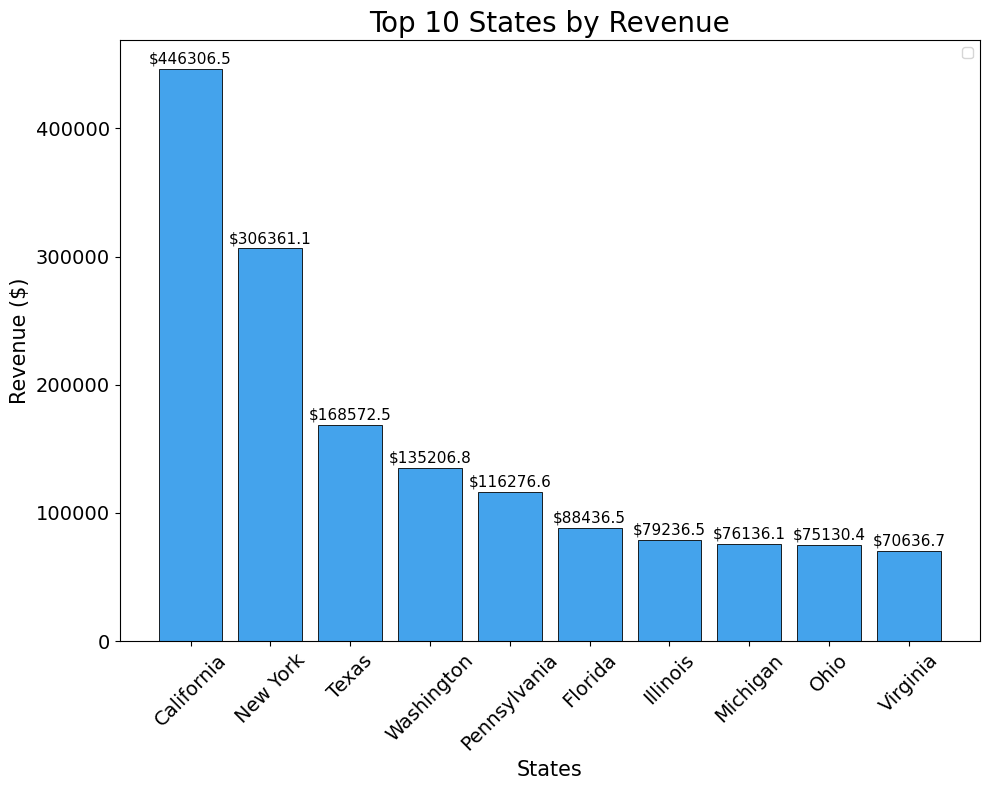

In [13]:
# Group df by States and sum every sales in each state
top_states = df.groupby('State')['Sales'].sum().reset_index()
top_states['Sales'] = top_states['Sales'].round(1)
top_states.sort_values(['Sales'], ascending=False, inplace=True)
top_states = top_states.head(10)

plt.figure(figsize=(10,8))

plt.bar(top_states['State'], top_states['Sales'], color='#44A3EC',
        edgecolor='k', linewidth=0.6)

# Show values at top of each bar
for i,value in  enumerate(top_states['Sales']):     
    plt.text(i,value + 4000 ,'$'+ str(value), fontsize=11,
                rotation=0,color='k', horizontalalignment='center')

plt.title('Top 10 States by Revenue', fontsize=20)    
plt.xlabel('States', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


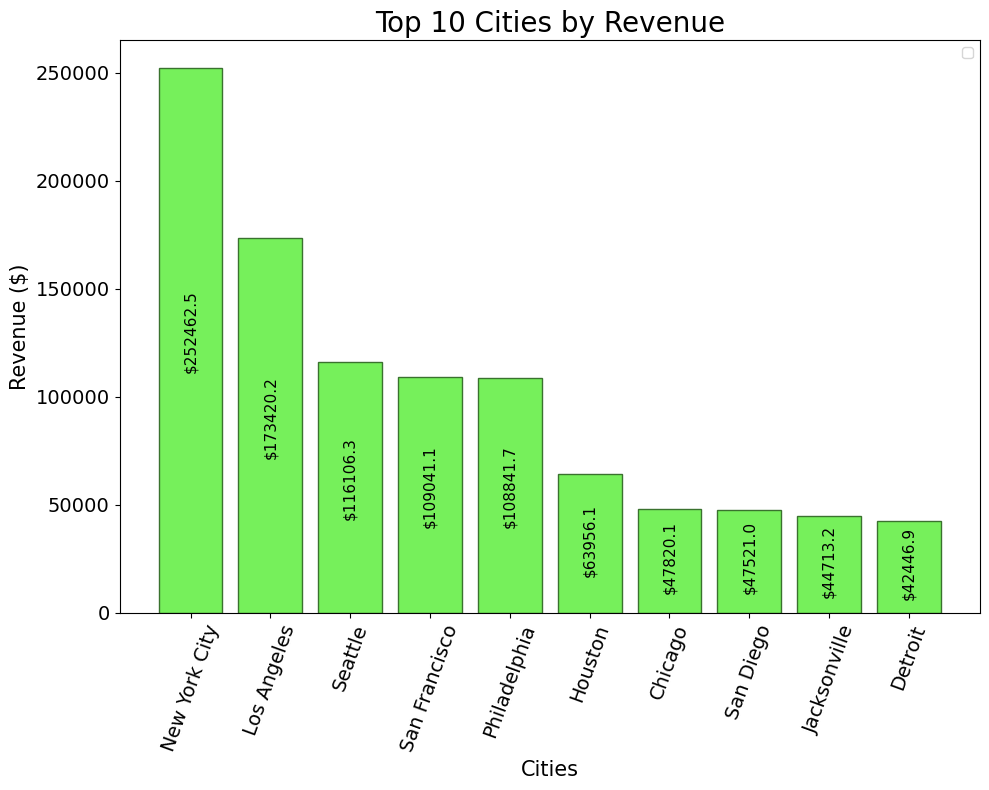

In [14]:
# Group df by Cities and sum every sales in each city

top_cities = df.groupby(['City']).sum(numeric_only=True).sort_values('Sales', ascending=False)
top_cities = top_cities[['Sales']].round(1)
top_cities.reset_index(inplace=True)
top_cities = top_cities.head(10)

plt.figure(figsize=(10,8))

plt.bar(top_cities['City'], top_cities['Sales'], color='#76F05B',
        edgecolor='#3A722E', linewidth=1)

# Show values at top of each bar
for i,value in  enumerate(top_cities['Sales']):     
  
    plt.text(i,value/2-14000 ,'$'+ str(value), fontsize=11,
                rotation=90,color='k', horizontalalignment='center')
    
plt.title('Top 10 Cities by Revenue', fontsize=20)    
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(fontsize=14, rotation=70)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
df.Region.unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_6296\3058292696.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  west_monthly_sales = west_df['Sales'].resample('M').sum()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_6296\3058292696.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  east_monthly_sales = east_df['Sales'].resample('M').sum()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_6296\3058292696.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  south_monthly_sales = south_df['Sales'].resample('M').sum()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_6296\3058292696.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  central_monthly_sales = central_df['Sales'].resample('M').sum()


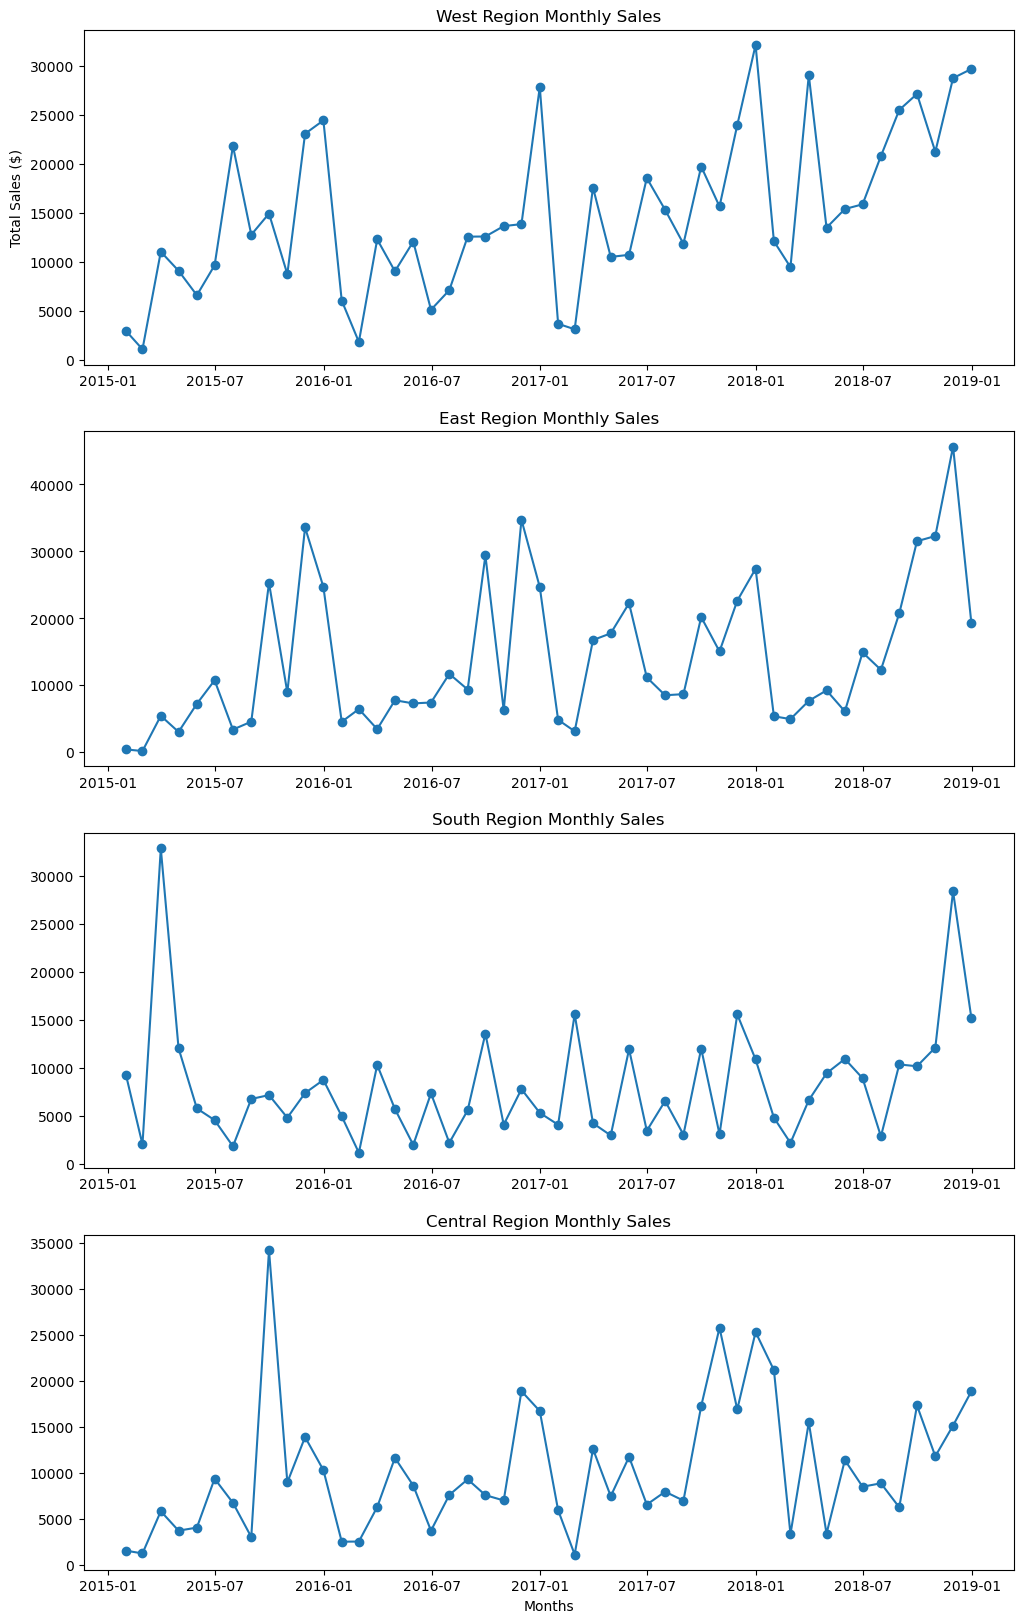

In [17]:
# In the first section we created a order_date_df, we can use it to solve this problem
west_df = order_date_df.loc[order_date_df['Region'] == 'West']
east_df = order_date_df.loc[order_date_df['Region'] == 'East']
south_df = order_date_df.loc[order_date_df['Region'] == 'South']
central_df = order_date_df.loc[order_date_df['Region'] == 'Central']

west_monthly_sales = west_df['Sales'].resample('M').sum()
west_monthly_sales = west_monthly_sales.round(2)

east_monthly_sales = east_df['Sales'].resample('M').sum()
east_monthly_sales = east_monthly_sales.round(2)

south_monthly_sales = south_df['Sales'].resample('M').sum()
south_monthly_sales = south_monthly_sales.round(2)

central_monthly_sales = central_df['Sales'].resample('M').sum()
central_monthly_sales = central_monthly_sales.round(2)

fig, (ax_west, ax_east, ax_south, ax_central) = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

ax_west.plot(west_monthly_sales.index, west_monthly_sales.values, marker='o', linestyle='-')
ax_east.plot(east_monthly_sales.index, east_monthly_sales.values, marker='o', linestyle='-')
ax_south.plot(south_monthly_sales.index, south_monthly_sales.values, marker='o', linestyle='-')
ax_central.plot(central_monthly_sales.index, central_monthly_sales.values, marker='o', linestyle='-')

ax_west.set_title('West Region Monthly Sales')
ax_east.set_title('East Region Monthly Sales')
ax_south.set_title('South Region Monthly Sales')
ax_central.set_title('Central Region Monthly Sales')
ax_west.set_ylabel('Total Sales ($)')
ax_central.set_xlabel('Months')
plt.show()

Customer Segmentation

In [18]:
# Calculating recency

recency_df = df.groupby('Customer Name', as_index=False)['Order Date'].max()
recent_date = recency_df['Order Date'].max()
recency_df['Recency'] = recency_df['Order Date'].apply(
lambda x: (recent_date - x).days)
recency_df.rename(columns={'Order Date':'Last Purchase Date'}, inplace=True)

In [19]:
# Calculating Frequency

frequency_df = df.groupby('Customer Name', as_index=False)['Order Date'].count()
frequency_df.rename(columns={'Order Date':'Frequency'}, inplace=True)

In [20]:
# Calculating monetary

monetary_df = df.groupby('Customer Name', as_index=False)['Sales'].sum()
monetary_df.rename(columns={'Sales':'Monetary'}, inplace=True)

In [46]:
# Merging all three df in one df

rfm_df = recency_df.merge(frequency_df, on='Customer Name')
rfm_df = rfm_df.merge(monetary_df, on='Customer Name')
rfm_df['Monetary'] = rfm_df['Monetary'].round(2)
rfm_df.drop(['Last Purchase Date'], axis=1, inplace=True)

rank_df = rfm_df.copy() # We make copy of rfm_df because we will need RFM features later

In [47]:
# Normalizing the rank of the customers

rank_df['r_rank'] = rank_df['Recency'].rank(ascending=False)
rank_df['f_rank'] = rank_df['Frequency'].rank(ascending=False)
rank_df['m_rank'] = rank_df['Monetary'].rank(ascending=False)

rank_df['r_rank_norm'] = (rank_df['r_rank'] / rank_df['r_rank'].max()) * 100
rank_df['f_rank_norm'] = (rank_df['f_rank'] / rank_df['f_rank'].max()) * 100
rank_df['m_rank_norm'] = (rank_df['m_rank'] / rank_df['m_rank'].max()) * 100

rank_df.drop(['r_rank','f_rank','m_rank'], axis=1, inplace=True)

In [48]:
#RFM stands for Recency, Frequency, and Monetary value.

Calculating RFM = 0.15 Recency score + 0.28 Frequency score + 0.57 * Monetary score

In [49]:
# Calculating RFM scores

rank_df['rfm_score'] = (0.15*rank_df['r_rank_norm']) + (0.28*rank_df['f_rank_norm']) + (0.57*rank_df['m_rank_norm'])
rank_df = rank_df[['Customer Name','rfm_score']]
rank_df['rfm_score'] = round(rank_df['rfm_score']*0.05, 2)

In [28]:
# Masking all customers rfm scores by rating conditions to set customer segments easily

top_customer_mask = (rank_df['rfm_score'] >= 4.5)
high_value_mask = ((rank_df['rfm_score']<4.5) & (rank_df['rfm_score']>=4))
medium_value_mask = ((rank_df['rfm_score']<4) & (rank_df['rfm_score']>=3))
low_value_mask = ((rank_df['rfm_score']<3) & (rank_df['rfm_score']>=1.6))
lost_mask = (rank_df['rfm_score'] < 1.6)

rank_df.loc[top_customer_mask, 'Customer Segment'] = 'Top Customer'
rank_df.loc[high_value_mask, 'Customer Segment'] = 'High Value Customer'
rank_df.loc[medium_value_mask, 'Customer Segment'] = 'Medium Value Customer'
rank_df.loc[low_value_mask, 'Customer Segment'] = 'Low Value Customer'
rank_df.loc[lost_mask, 'Customer Segment'] = 'Lost Customer'

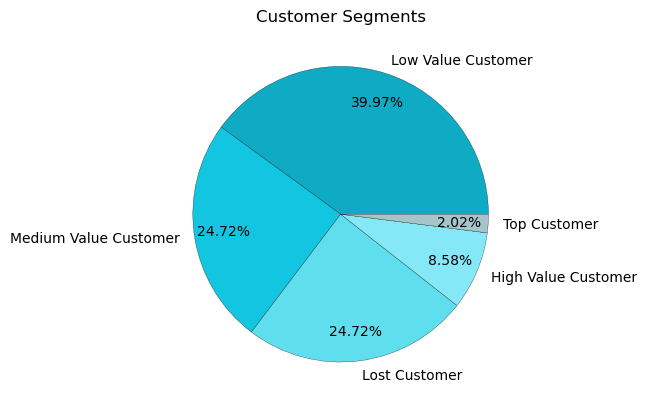

In [29]:
# Visualization of customer segments

colors = ['#0FABC4','#12C6E1','#5FDFEE','#85E8F7','#A6C5CA']
plt.pie(rank_df['Customer Segment'].value_counts(), labels=rank_df['Customer Segment'].value_counts().index,
       autopct='%.2f%%', pctdistance=0.8, labeldistance=1.1, colors=colors,
       shadow=False, wedgeprops={'edgecolor':'k','linewidth':0.2})
plt.title('Customer Segments')
plt.show()

In [30]:
#Find time since first purchase for every customer

first_purchase_df = df.groupby('Customer Name', as_index=False)['Order Date'].min()
first_purchase_df.rename(columns={'Order Date':'First Purchase Date'}, inplace=True)

new_df = df.copy() # Make sure changes we will make doesn't affect original df so we copy it
new_df = new_df.merge(first_purchase_df, on='Customer Name',how='left')
new_df['Time Since First Purchase'] = (new_df['Order Date'].max() -
                                        new_df['First Purchase Date']).dt.days

In [31]:
# Add recancy,frequency,monetary and segment columns to df. We found those features in the previous section

new_df = new_df.merge(rfm_df, on='Customer Name', how='left')
new_df = new_df.merge(rank_df, on='Customer Name', how='left')

In [32]:
# Find churned and not churned customers

churned = (new_df['Customer Segment'] == 'Lost Customer')
not_churned = (new_df['Customer Segment'] != 'Lost Customer')

new_df.loc[churned, 'Churned'] = 1
new_df.loc[not_churned, 'Churned'] = 0
new_df['Churned'] = new_df['Churned'].astype('int64')

In [33]:
#Rename Churned column to Churn

new_df.rename(columns={'Churned':'Churn'}, inplace=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

features = ['Recency','Frequency','Monetary','Time Since First Purchase']
target = 'Churn'

# Create features and target 
X = new_df[features]
y = new_df[target]

# Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Logistic Regression is one of the best model in churn prediction

model = LogisticRegression()

In [36]:
# Train model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [38]:
print(f'Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.937
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1231
           1       0.94      0.89      0.91       729

    accuracy                           0.94      1960
   macro avg       0.94      0.93      0.93      1960
weighted avg       0.94      0.94      0.94      1960



Product Analysis

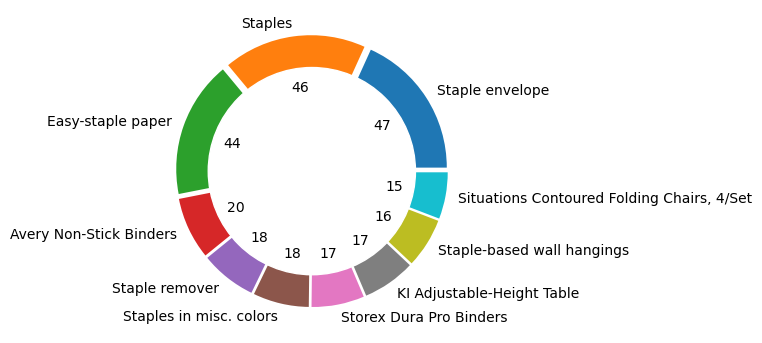

In [40]:
# We found product_df in Sales Performance Analysis so we can use that for this task and we already find top 10 total sales products
product_top_10_amount = product_df.sort_values('Amount', ascending=False).head(10)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

explodes = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
plt.pie(product_top_10_amount['Amount'], labels=product_top_10_amount['Product Name'],
       explode=explodes, autopct=autopct_format(product_top_10_amount['Amount']))
circle = plt.Circle((0,0),0.8,color='w')
plt.gcf().gca().add_artist(circle)
plt.tight_layout()
plt.show()

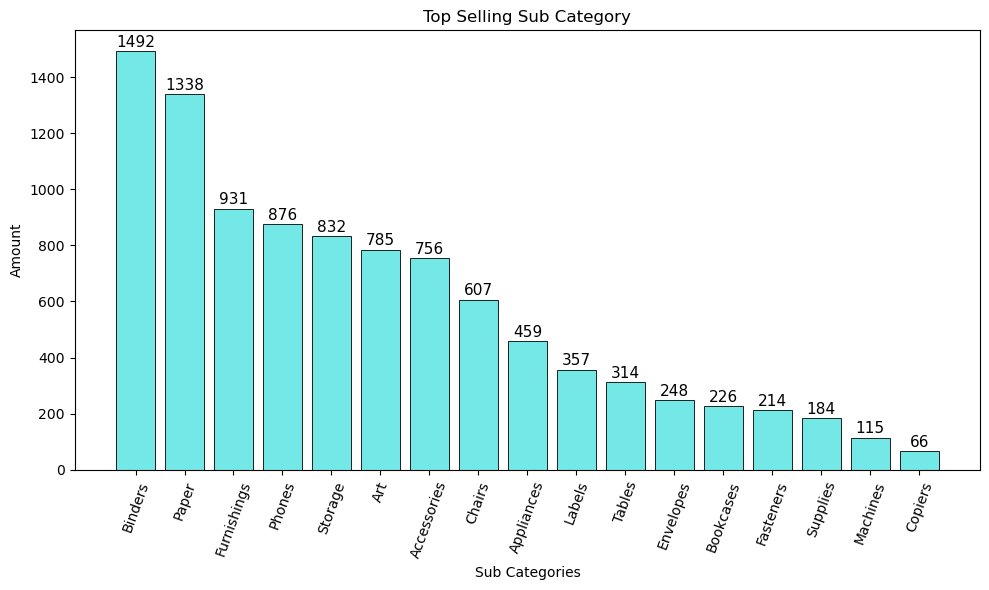

In [41]:
plt.figure(figsize=(10,6))

plt.bar(df['Sub-Category'].value_counts().index, df['Sub-Category'].value_counts(),
        color='#74e8e6',edgecolor='k', linewidth=0.6)

plt.title('Top Selling Sub Category')
plt.xlabel('Sub Categories')
plt.ylabel('Amount')
plt.xticks(rotation=70)

for i,value in  enumerate(df['Sub-Category'].value_counts()):     
  
    plt.text(i,value+15 , str(value), fontsize=11,
                rotation=0,color='k', horizontalalignment='center')

plt.tight_layout()
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_6296\2295693235.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_office = office_supplies_df['Quantity'].resample('M').sum()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_6296\2295693235.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_technology = technology_df['Quantity'].resample('M').sum()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_6296\2295693235.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_furniture = furniture_df['Quantity'].resample('M').sum()


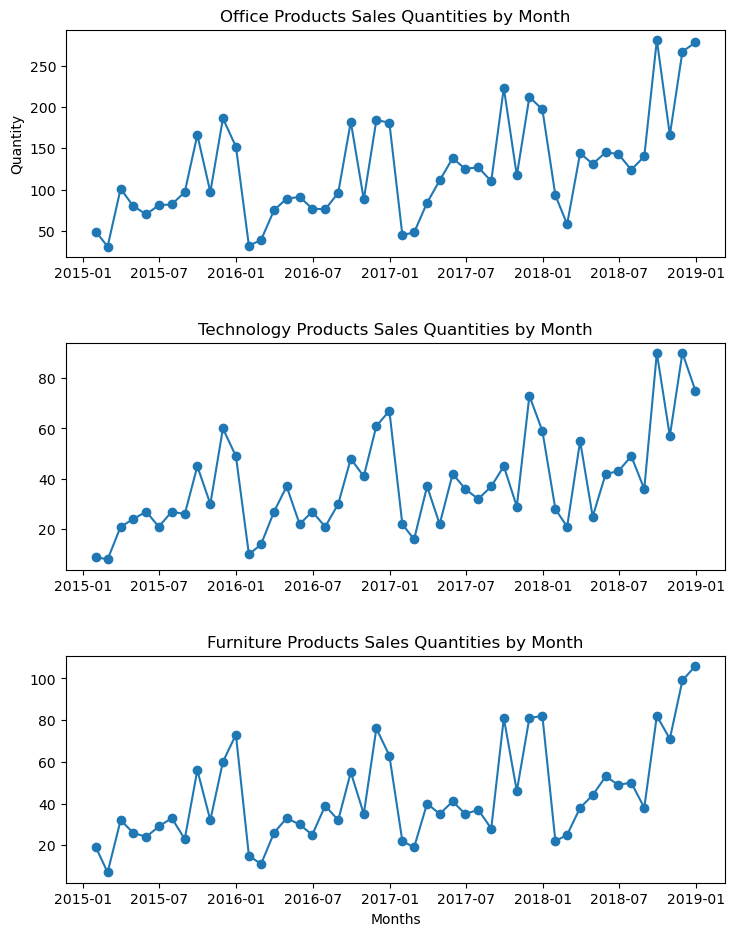

In [44]:
# In dataset it is obvious that every row represent 1 quantity of product sale.
#  So we create column named 'Quantity' and set it to 1


order_date_df['Quantity'] = 1

office_supplies_df = order_date_df.loc[order_date_df['Category'] == 'Office Supplies']
technology_df = order_date_df.loc[order_date_df['Category'] == 'Technology']
furniture_df = order_date_df.loc[order_date_df['Category'] == 'Furniture']

# Find how many quantities sold per month for each category

monthly_office = office_supplies_df['Quantity'].resample('M').sum()
monthly_technology = technology_df['Quantity'].resample('M').sum()
monthly_furniture = furniture_df['Quantity'].resample('M').sum()

# Creating subplots for each category

fig, (ax_off,ax_tech,ax_fur) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))

ax_off.plot(monthly_office.index, monthly_office.values, marker='o',linestyle='-')
ax_tech.plot(monthly_technology.index, monthly_technology.values, marker='o',linestyle='-')
ax_fur.plot(monthly_furniture.index, monthly_furniture.values, marker='o',linestyle='-')

ax_off.set_title('Office Products Sales Quantities by Month')
ax_tech.set_title('Technology Products Sales Quantities by Month')
ax_fur.set_title('Furniture Products Sales Quantities by Month')
ax_off.set_ylabel('Quantity')
ax_fur.set_xlabel('Months')
fig.tight_layout(pad=3.0)
plt.show()

Order Processing Efficiency

In [45]:
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days
for unique in df['Ship Mode'].unique():
    print(unique.upper())
    print('Mean processing day' + ': ' + 
          str(round(df.loc[df['Ship Mode'] == unique]['Processing Time'].mean())))
    print('Max processing day: ' + str(df.loc[df['Ship Mode'] == unique]['Processing Time'].max()))
    print('Min processing day: ' + str(df.loc[df['Ship Mode'] == unique]['Processing Time'].min()))
    print('\n')

STANDARD CLASS
Mean processing day: 5
Max processing day: 7
Min processing day: 3


SECOND CLASS
Mean processing day: 3
Max processing day: 5
Min processing day: 1


FIRST CLASS
Mean processing day: 2
Max processing day: 4
Min processing day: 1


SAME DAY
Mean processing day: 0
Max processing day: 1
Min processing day: 0




In summary except same day, first class is the best in processing day as expected but if we check all the stats there is not big difference between ship modes